## Filtering Function (Implementzation which uses only numpy library)
Filt function which performs the task of filtering. <br>
The function should take the following arguments: input, filter, padding, normalization.  The 'input' would be the numpy representation
of an image over which filtering is to be performed - this will either have a single channel or three channels,
'filter' would be a 2D numpy array representing the filter (for example: np.array([[1, 1, 1], [1, 1, 1], [1, 1,1]]), 'padding' would be a boolean value which would determine as to whether the output image should
have the same size as the input image, and 'normalization' would again be a boolean value which would determine as to whether the filtering operation needs to be normalized or not. The output of this function
should be the filtered image. Also note that the only external library which can be used in this function is "numpy".

In [2]:
%tensorflow_version 1.x
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
def filt(input,filter,padding,normalization):
  """
  input : numpy representation of an image over which filtering is to be performed and 
           will either have a single channel or three channels.

  filter: a 2D numpy array representing the filter/kernel to be applied on image.

  padding: a boolean value which would determine as to whether the output image should have the same size as the input image.

  normalization: a boolean value which would determine as to whether the filtering operation needs to be normalized or not.

  output: The filtered image.
  """
  filter_shape = filter.shape
  input_shape = input.shape
  channel_shape = input_shape[0:2]

  if padding == True:
    output = np.zeros_like(input,dtype=int)           # same size as input if padding on
    padding_size = ((filter_shape[0]-1)//2,(filter_shape[1]-1)//2)    # we will F-1 padding to keep it same size  (dividing by 2 for np.pad)

    if len(input_shape)==3:
      new_input = np.zeros((input_shape[0]+padding_size[0]*2,input_shape[1]+padding_size[1]*2,input_shape[2]))
      
      new_input[:, :, 0]= np.pad(input[:, :, 0], padding_size, mode='constant') #padding on each color channel
      new_input[:, :, 1]= np.pad(input[:, :, 1], padding_size, mode='constant')
      new_input[:, :, 2]= np.pad(input[:, :, 2], padding_size, mode='constant')
    
    else:
      new_input = np.zeros((input_shape[0]+padding_size[0]*2,input_shape[1]+padding_size[1]*2))
      new_input = np.pad(input, padding_size, mode='constant') 
  
  if padding == False:
    new_input = np.copy(input)
    image_subtract_filter = np.subtract(channel_shape,filter_shape)   # output will be of size N-F+ 1

    if len(input_shape) ==3:
      output = np.zeros((image_subtract_filter[0]+1,image_subtract_filter[1]+1,new_input.shape[2]), dtype=int)
    
    else:
      output = np.zeros((image_subtract_filter[0]+1,image_subtract_filter[1]+1), dtype=int)

  if normalization == True:
    new_input = new_input.astype(np.float32)
    output = output.astype(np.float32)

    if len(input_shape) ==3:
      new_input[:, :, 0]= (new_input[:, :, 0] - np.amin(new_input[:, :, 0])) / (np.amax(new_input[:, :, 0])- np.amin(new_input[:, :, 0]))
      new_input[:, :, 1]= (new_input[:, :, 1] - np.amin(new_input[:, :, 1])) / (np.amax(new_input[:, :, 1])- np.amin(new_input[:, :, 1]))
      new_input[:, :, 2]= (new_input[:, :, 2] - np.amin(new_input[:, :, 2])) / (np.amax(new_input[:, :, 2])- np.amin(new_input[:, :, 2]))
      
    else:
      new_input = (new_input -  np.amin(new_input))/ np.amax(new_input)+ np.amin(new_input)

  x_range = output.shape[0]-filter.shape[0] +1  
  y_range = output.shape[1]-filter.shape[1] +1

  if len(input_shape)==3:
    for i in range(len(np.shape(new_input))):
      for x in range(x_range):
        for y in range(y_range):
          output[x, y,i]=(filter * new_input[:, :, i][x: x+filter.shape[0], y: y+filter.shape[1]]).sum()   #sliding to apply filter on whole image

  else:
      for x in range(x_range):
        for y in range(y_range):
          output[x, y]=(filter * new_input[x: x+filter.shape[0], y: y+filter.shape[1]]).sum()   #sliding to apply filter on whole image
  return output


### Examples
The filters used in the examples below are extracted from [the work of Lode Vandevenne](https://lodev.org/cgtutor/filtering.html). (Vandevenne, 2018).

Image on which filters are being applied

In [4]:
!wget https://miro.medium.com/max/1533/1*nxSOyBGWCvsc1r3EXpcELg.jpeg   #image to be used as an example
# rename the image as im

--2020-06-02 13:24:44--  https://miro.medium.com/max/1533/1*nxSOyBGWCvsc1r3EXpcELg.jpeg
Resolving miro.medium.com (miro.medium.com)... 104.16.117.145, 104.16.120.145, 104.16.118.145, ...
Connecting to miro.medium.com (miro.medium.com)|104.16.117.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67577 (66K) [image/jpeg]
Saving to: ‘1*nxSOyBGWCvsc1r3EXpcELg.jpeg’

1*nxSOyBGWCvsc1r3EX 100%[===================>]  65.99K  --.-KB/s    in 0.005s  

2020-06-02 13:24:44 (13.8 MB/s) - ‘1*nxSOyBGWCvsc1r3EXpcELg.jpeg’ saved [67577/67577]



(-0.5, 583.5, 388.5, -0.5)

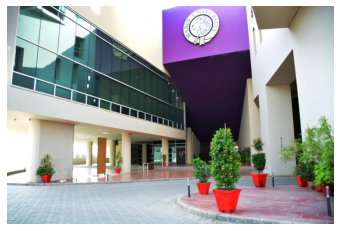

In [5]:
#image to be used
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("im.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

In [0]:
def filtered_subplots(image,filter):
  """
  image: the image on which filter is to be applied

  filter: a numpy array as a filter to be applied on the image
  """
  fig, axs = plt.subplots(2, 3, figsize= (15,8))

  axs[0,0].set_title("origrnal image")
  axs[0,0].imshow(image)
  axs[0,0].axis('off')

  axs[1,0].set_title("library implemenation")
  axs[1,0].imshow(cv2.filter2D(image, -1, filter))
  axs[1,0].axis('off')

  axs[0,1].set_title("my implemenation:normalaization + padding on")
  axs[0,1].imshow(filt(image,filter,True,True))
  axs[0,1].axis('off')

  axs[1,1].set_title("my implemenation:normalaization on, padding off")
  axs[1,1].imshow(filt(image,filter,False,True))
  axs[1,1].axis('off')

  axs[0,2].set_title("my implemenation:normalaization off, padding on")
  axs[0,2].imshow(filt(image,filter,True,False))
  axs[0,2].axis('off')

  axs[1,2].set_title("my implemenation:normalaization + padding off")
  axs[1,2].imshow(filt(image,filter,False,False))
  axs[1,2].axis('off')

  fig.tight_layout()
  plt.show()

#### i) Same Image
The filter filled in currently, <br>
[ 0 0 0 ] <br>
[ 0 1 0 ] <br>
[ 0 0 0 ] <br>

does nothing more than returning the original image,

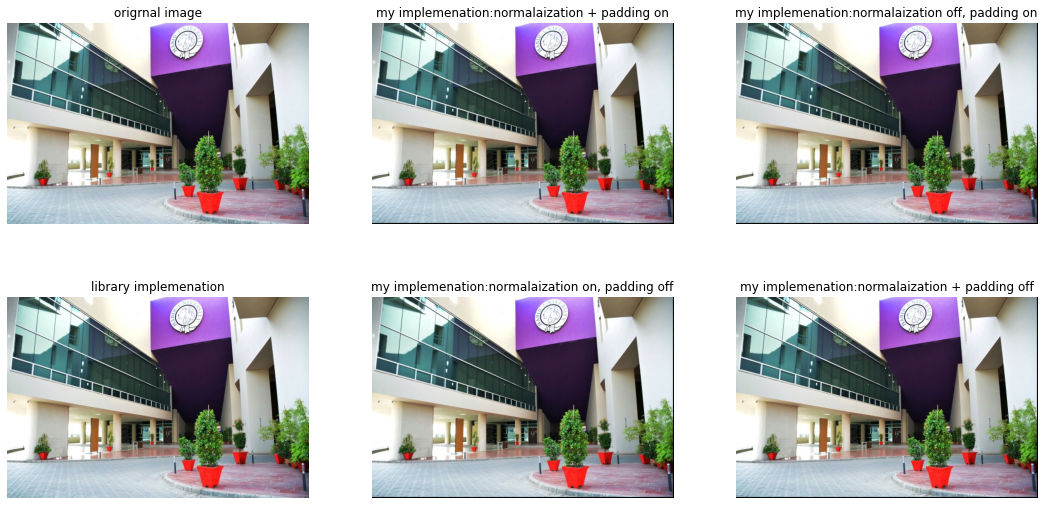

In [0]:
filter = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
filtered_subplots(image,filter)

#### ii) Find Edges
A filter to find edges of an image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


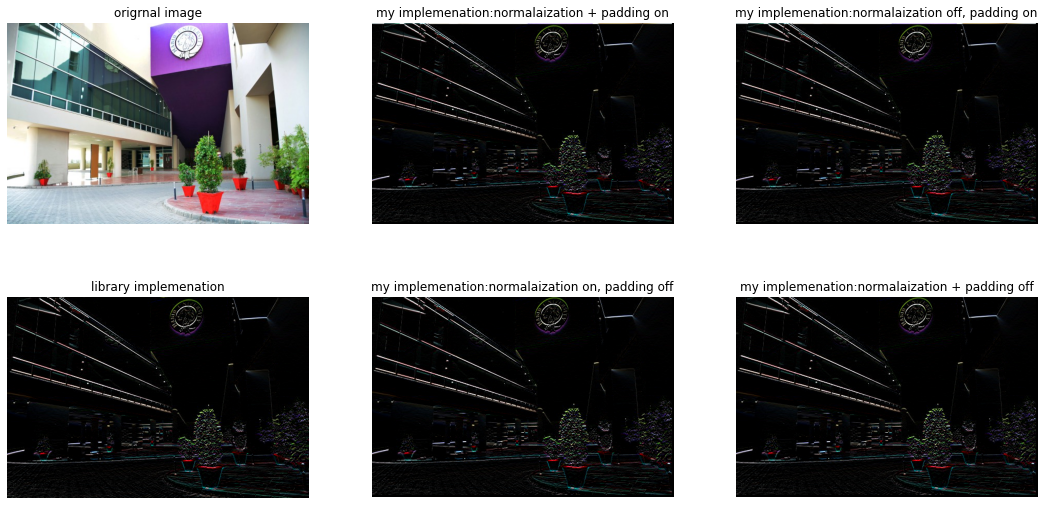

In [0]:
filter = np.array([[0,  0, -1,  0,  0,],[0,  0, -1,  0,  0],[0,  0,  2,  0,  0],[0,  0,  0,  0,  0],[0,  0,  0,  0,  0]])
filtered_subplots(image,filter)

#### iii) Blur

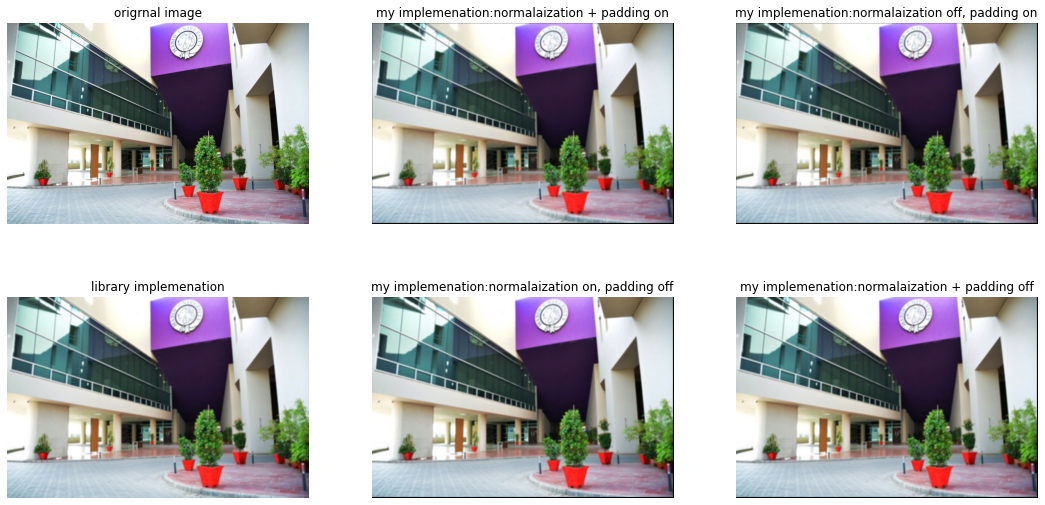

In [7]:
filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])* (1/9)
filtered_subplots(image,filter)


#### iv) Sharpening
The details of the image will be emphasized.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


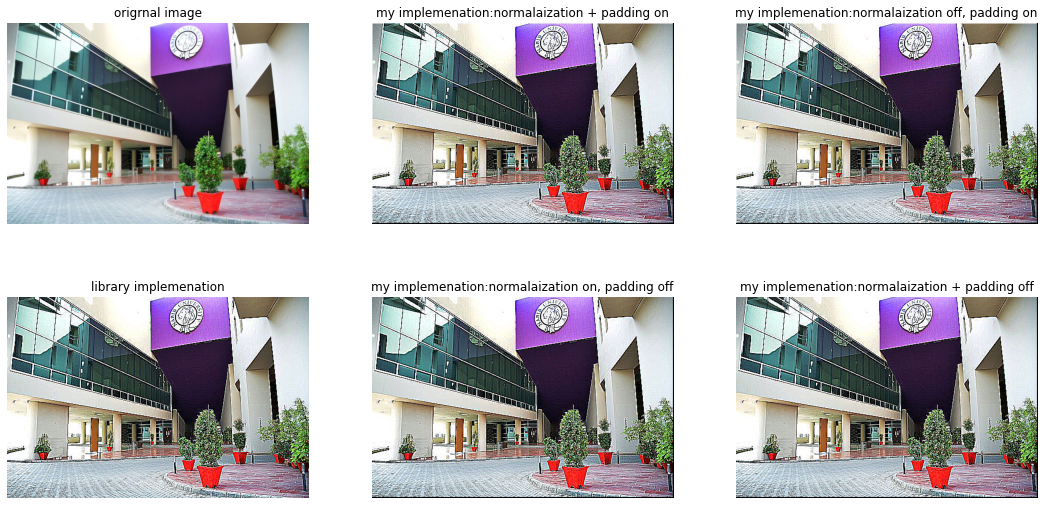

In [9]:
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filtered_subplots(image,filter)

#### v) Emboss
An emboss filter gives a 3D shadow effect to the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


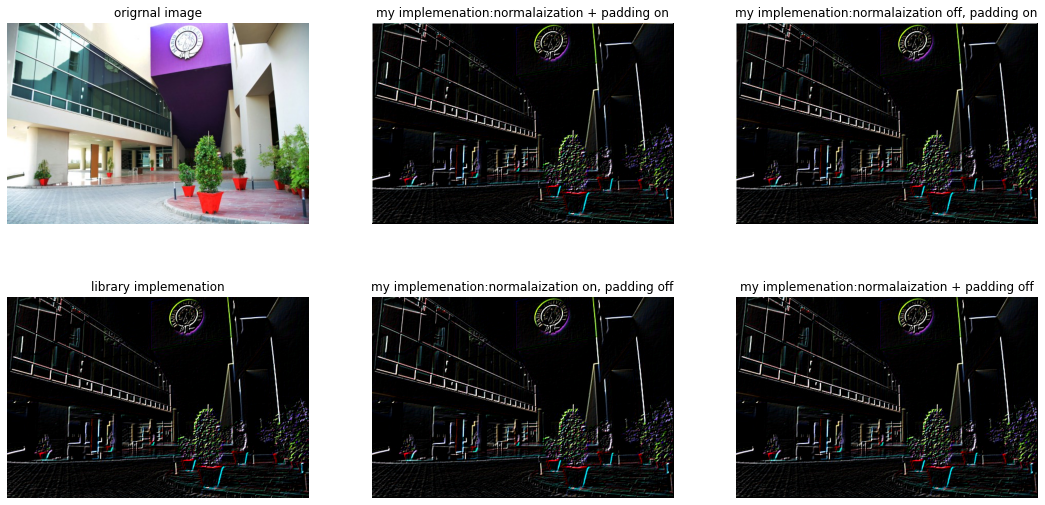

In [10]:
filter = np.array([[   -1, -1,  0],[-1,  0,  1],[0,  1,  1]])  #emboss filter
filtered_subplots(image,filter)